In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore



# Direct download link for the CSV file
file_path = '/content/drive/MyDrive/financial_risk_assessment.csv'

# Load dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Education Level,object
Marital Status,object
Income,float64
Credit Score,float64
Loan Amount,float64
Loan Purpose,object
Employment Status,object
Years at Current Job,int64


In [ ]:
#checkinh the presence of any null values
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,2250
Credit Score,2250
Loan Amount,2250
Loan Purpose,0
Employment Status,0
Years at Current Job,0


In [ ]:
#handling the nan values -
#for int type or float type -> replacing nan vlaues with 'MEAN' of that column
# for object type -> replacing nan vlaues with 'MODE' of that column

for col in df.columns :
  if df[col].isnull().sum() > 0 :
    if df[col].dtype == 'object' :
      df[col] = df[col].fillna(df[col].mode()[0])

    elif df[col].dtype == 'int64' or df[col].dtype == 'float64' :
      df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,0
Credit Score,0
Loan Amount,0
Loan Purpose,0
Employment Status,0
Years at Current Job,0


In [ ]:
df.shape

(15000, 20)

In [ ]:
#converting categorical and object type data into numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns :
  if df[col].dtype == 'object' :
    df[col] = le.fit_transform(df[col])

df.tail()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
14995,23,2,0,3,48088.00000,609.0,26187.000000,2,1,2,1,0.317633,159741.497176,4.00000,9250,49,58,2.0,0,1
14996,56,1,3,2,107193.00000,700.0,35111.000000,0,1,10,1,0.155126,79102.000000,2.02651,7242,55,49,0.0,0,2
14997,29,2,3,1,46250.00000,642.0,44369.000000,2,2,19,0,0.593999,196930.000000,4.00000,8929,21,165,2.0,1,0
14998,53,2,3,0,40180.00000,638.0,32752.000000,2,1,12,0,0.478035,276060.000000,2.02651,7699,0,180,0.0,2,0
14999,24,2,0,3,69933.39851,765.0,27450.010902,3,1,18,0,0.116083,71699.000000,3.00000,9036,55,186,3.0,2,1


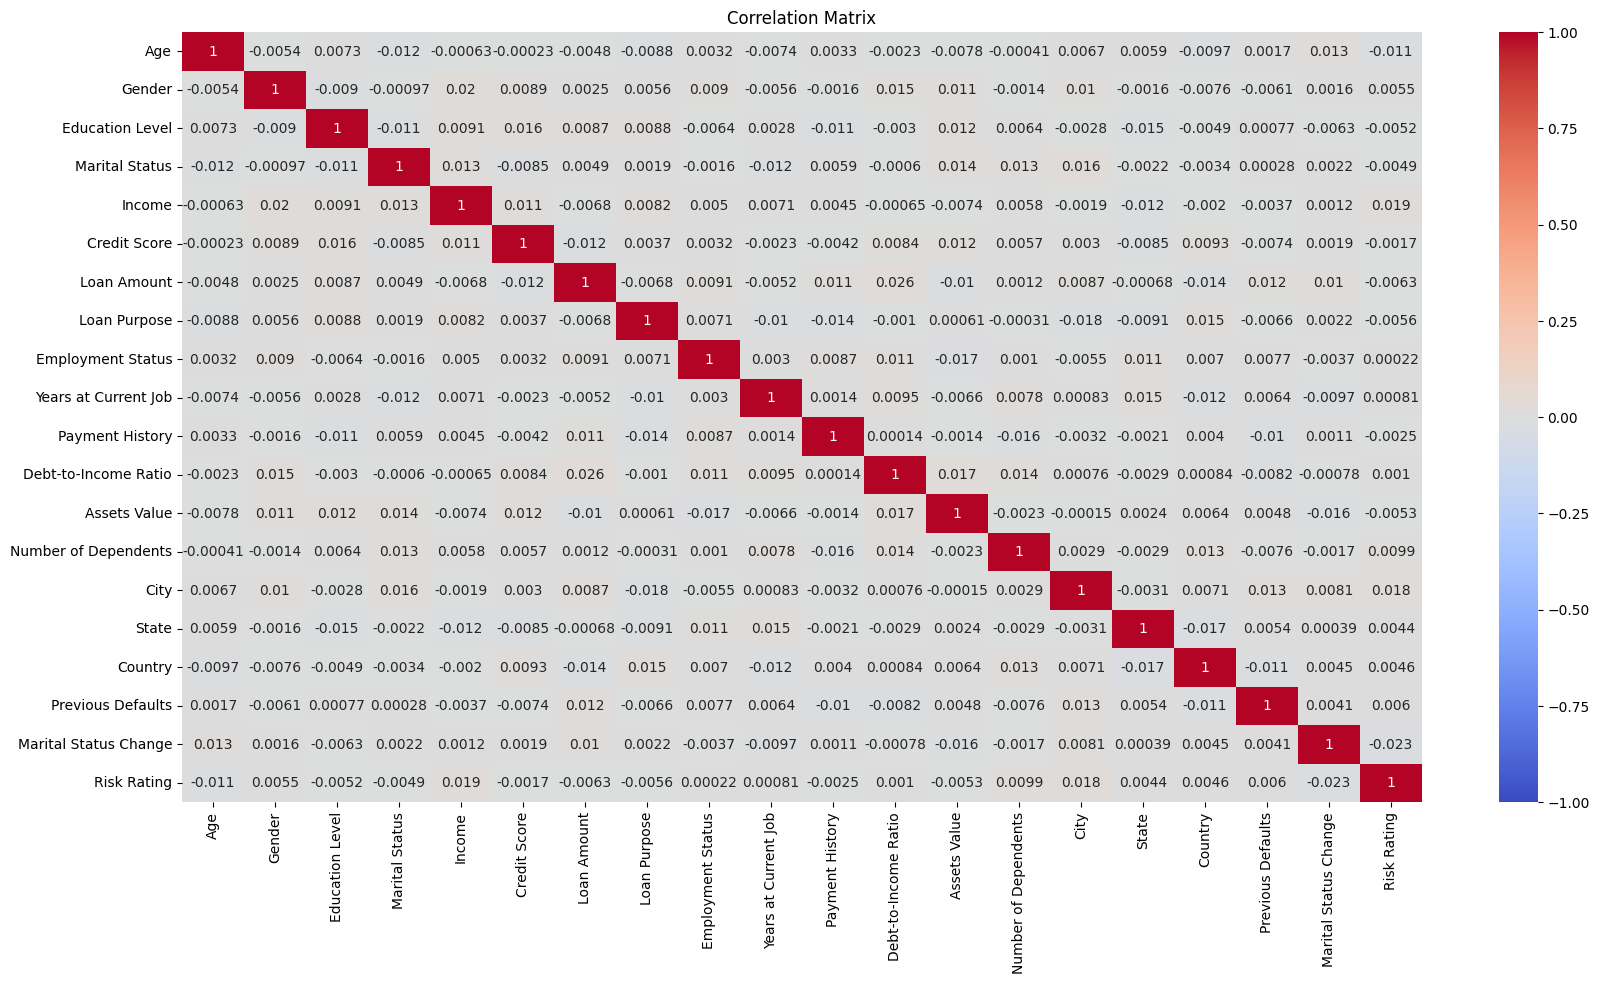

In [ ]:
#checking how are features coreelated to each other and with the output, so that we can remove 2 highly coreelated feature

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
risk_rating = df['Risk Rating']

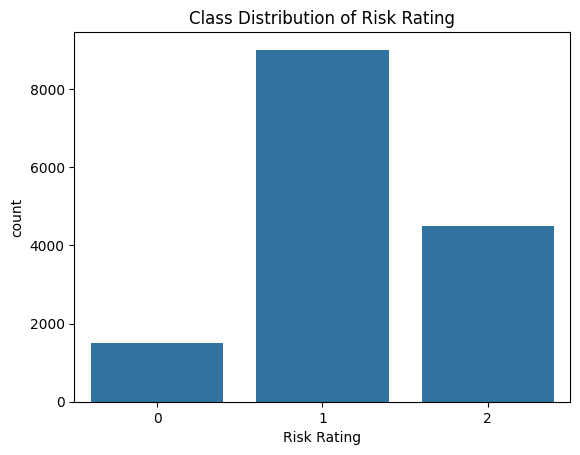

Risk Rating
1    9000
2    4500
0    1500
Name: count, dtype: int64


In [ ]:
#Class distribution of the risk rating

sns.countplot(x='Risk Rating', data=df)
plt.title("Class Distribution of Risk Rating")
plt.show()
print(risk_rating.value_counts())

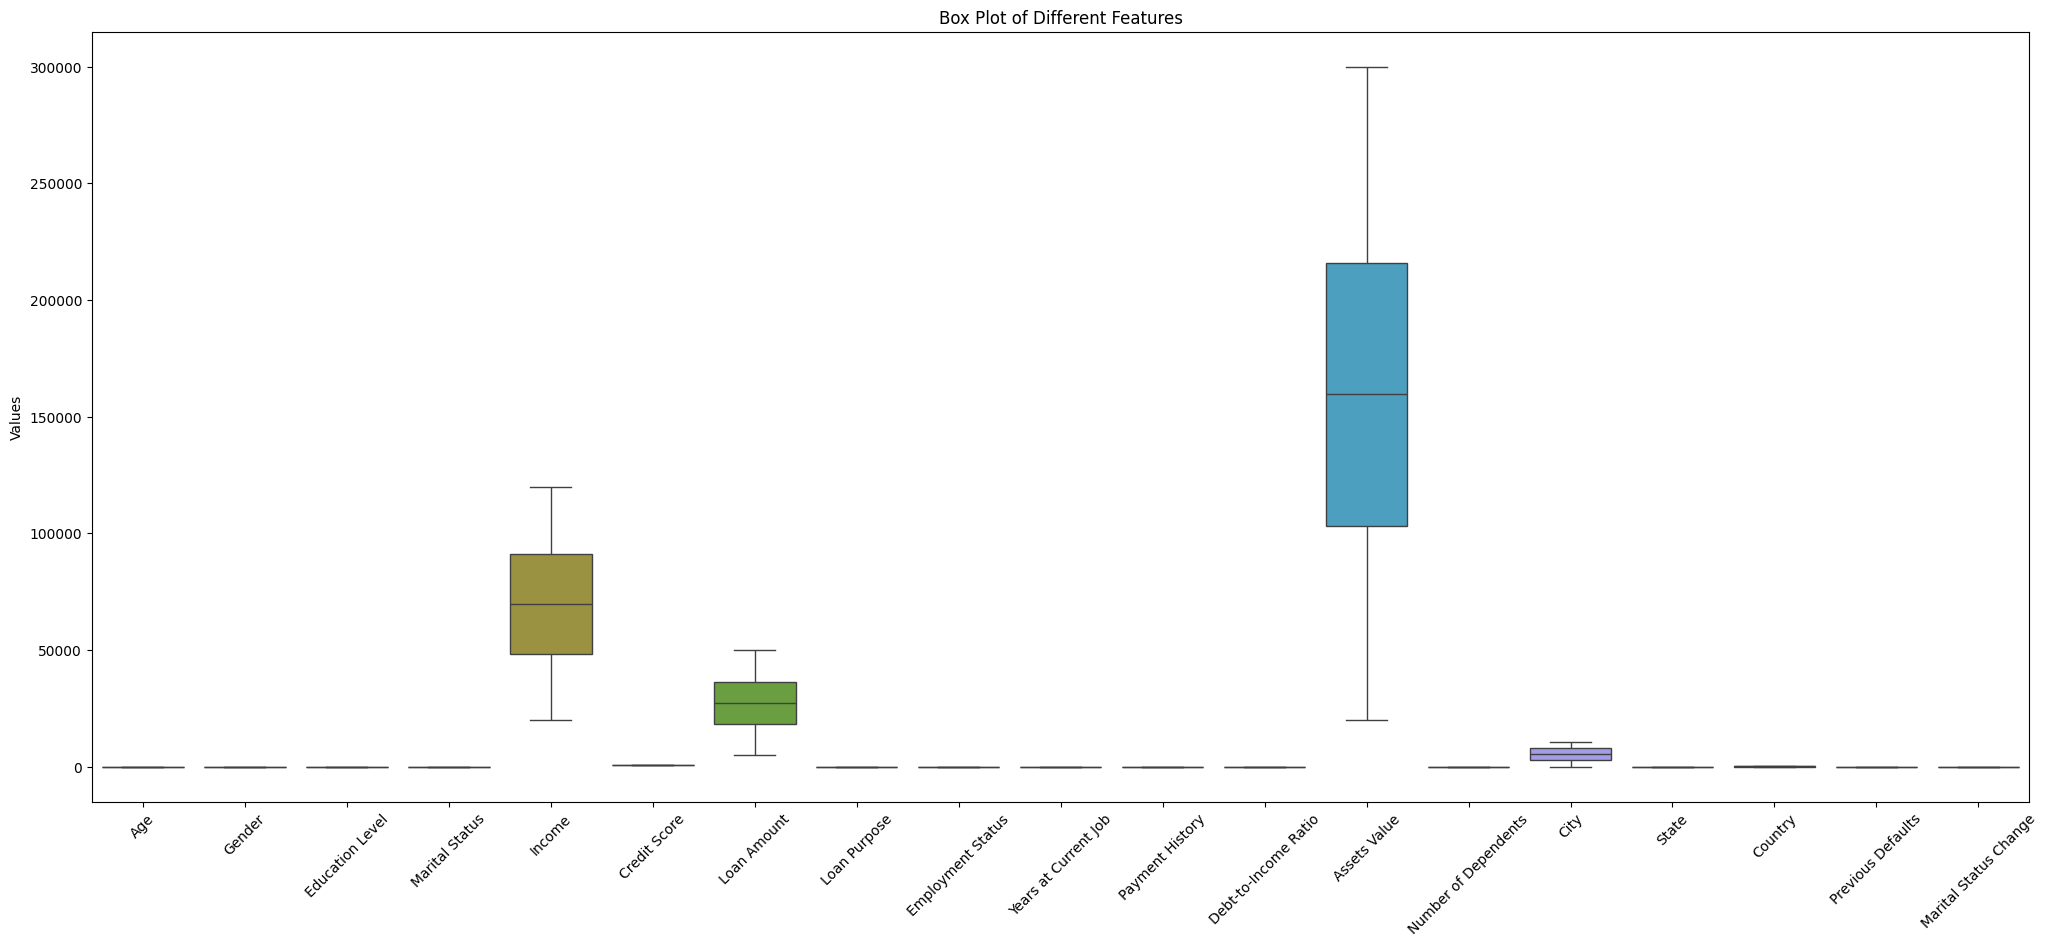

In [ ]:
#box plot

plt.figure(figsize=(25, 10))
sns.boxplot(data=df.drop('Risk Rating', axis = 1))
plt.title("Box Plot of Different Features")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.show()

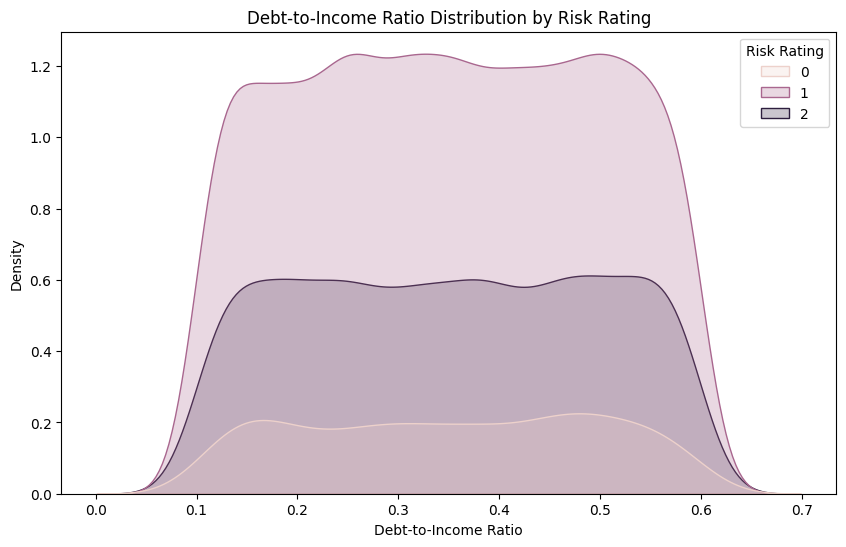

In [ ]:
# plot - 1: Debt-to-Income Ratio Distribution by Risk Rating
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Debt-to-Income Ratio', hue='Risk Rating', fill=True)
plt.title("Debt-to-Income Ratio Distribution by Risk Rating")
plt.show()

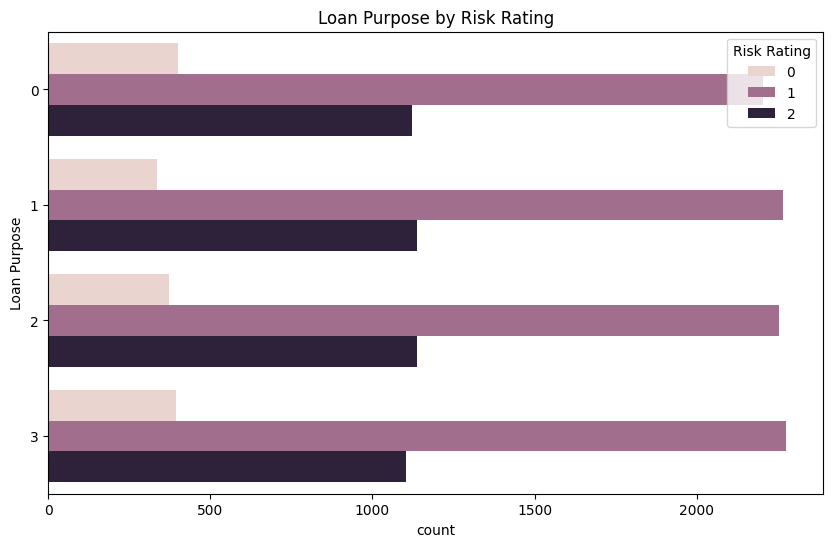

In [ ]:
# plot - 2: Loan Purpose Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Loan Purpose', hue='Risk Rating')
plt.title("Loan Purpose by Risk Rating")
plt.show()

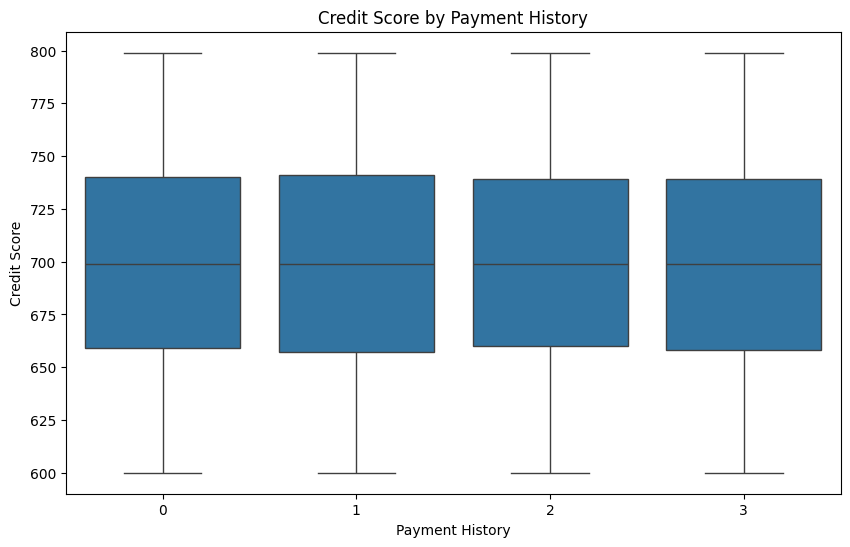

In [ ]:
# plot - 3: Analysis of Payment History and Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Payment History', y='Credit Score')
plt.title("Credit Score by Payment History")
plt.show()

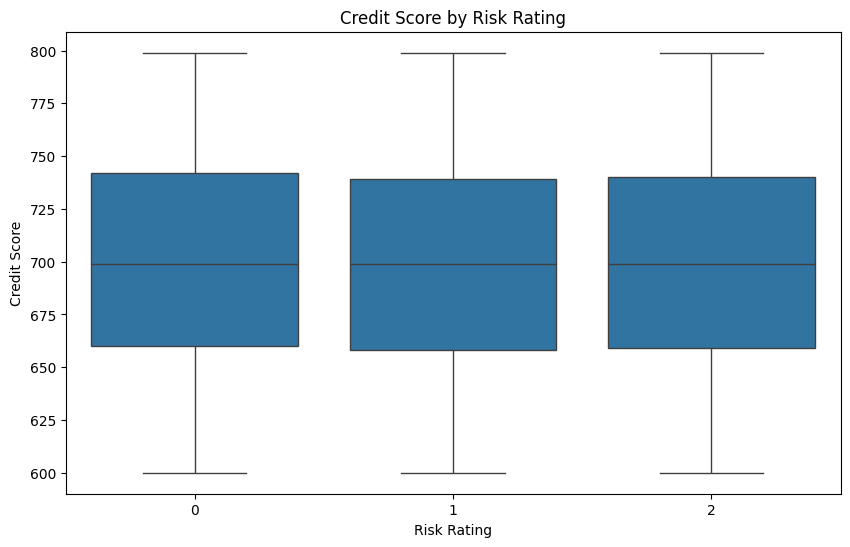

In [ ]:
# plot - 4: Credit Score vs. Risk Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Risk Rating', y='Credit Score')
plt.title("Credit Score by Risk Rating")
plt.show()

#Using Different Models for Prediction

##A>> Decision Tree with MaxDepth = 10

###1.With RFE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

X = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Decision Tree model with max_depth of 10
model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)

# Using RFE to selsect 10 features
rfe = RFE(estimator=model_dt, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# Selected features after RFE
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Training the model_dt with selected features only
model_dt.fit(X_train[selected_features], y_train)

y_pred = model_dt.predict(X_test[selected_features])
y_pred_train = model_dt.predict(X_train[selected_features])

# Evaluating the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Selected Features: Index(['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'City', 'State', 'Country'],
      dtype='object')
Training Accuracy: 0.6502857142857142
Test Accuracy: 0.5688888888888889


###2.Without RFE

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)
y_pred_train = model_dt.predict(X_train)

# Evaluating the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Training Accuracy: 0.6598095238095238
Test Accuracy: 0.5577777777777778


###3.Deciosion Tree with Hyperparameter tuning using GridSeachCV to Find best Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, None],                # Depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
    'criterion': ['gini', 'entropy']               # Splitting criterion
}

# Set up GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=1)

grid_search_dt.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_) #Printing the Parameters for BestDecisionTRee model

best_model_dt = grid_search_dt.best_estimator_ #Using the best model to predict
y_pred_dt = best_model_dt.predict(X_test)
y_train_pred_dt = best_model_dt.predict(X_train)

print("Train Accuracy (Decision Tree):", accuracy_score(y_train_pred_dt, y_train))
print("Test Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Train Accuracy (Decision Tree): 0.6042857142857143
Test Accuracy (Decision Tree): 0.596


##B>> Using Logistic Refression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter= 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5982222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##C>> Using RandomForest

###1. Using RandomForest with 500 estimators(Decsion Trees)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into features (X) and target (y)
X = df.drop('Risk Rating', axis=1)  # Assuming 'Risk Rating' is the target column
y = df['Risk Rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Random Forest model
model = RandomForestClassifier(max_samples = 0.75, random_state=42, n_estimators= 100,max_depth=10,max_features='sqrt',min_samples_split=5)

# Training the model
model.fit(X_train, y_train)

# model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluating the model
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.6072380952380952
Test Accuracy: 0.598


>**Filter High-Confidence Predictions and Evaluate Model Performance**

In [ ]:
prob=pd.DataFrame(model.predict_proba(X_test).tolist(),columns=model.classes_)
# print(prob.head(3))
prob['max_prob']=prob.max(axis=1)
# print('New prob df')
# print(prob.head(3))
id=prob[prob['max_prob']>0.66542].index
id=id.to_list()
print("Accuracy Score=",accuracy_score(y_test.iloc[id],y_pred[id]),'\n')
print("Classification Report:\n", classification_report(y_test.iloc[id],y_pred[id]))

Accuracy Score= 0.6382978723404256 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.64      1.00      0.78        30
           2       0.00      0.00      0.00        12

    accuracy                           0.64        47
   macro avg       0.21      0.33      0.26        47
weighted avg       0.41      0.64      0.50        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
prob.head()

,0,1,2,max_prob
0,0.112346,0.602071,0.285583,0.602071
1,0.097337,0.574366,0.328297,0.574366
2,0.099196,0.580849,0.319955,0.580849
3,0.096227,0.604775,0.298998,0.604775
4,0.102270,0.575053,0.322677,0.575053


##2. RandomForestClassifier with Hyperparameter tuning using GridSeachCV to Find RandomForestClassifier Model

In [ ]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],               # Number of trees
    'max_depth': [10, 20, None],             # Limiting the max depth options
    'max_features': ['log2', 'sqrt'],        # Basic feature settings
    'min_samples_split': [2, 5]              # Testing only two options for min samples
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_ ## Using the best estimator to predict
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Evaluating the model
print("Train Accuracy:", accuracy_score(y_train_pred, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}
Train Accuracy: 0.6102857142857143
Test Accuracy: 0.5982222222222222


>**Filter High-Confidence Predictions and Evaluate Model Performance**

In [ ]:
prob=pd.DataFrame(best_model.predict_proba(X_test).tolist(),columns=best_model.classes_)
prob['max_prob']=prob.max(axis=1)

id=prob[prob['max_prob']>0.6705].index
id=id.to_list()
print("Accuracy Score=",accuracy_score(y_test.iloc[id],y_pred[id]),'\n')
print("Classification Report:\n", classification_report(y_test.iloc[id],y_pred[id]))

Accuracy Score= 0.6296296296296297 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.63      1.00      0.77        17
           2       0.00      0.00      0.00         8

    accuracy                           0.63        27
   macro avg       0.21      0.33      0.26        27
weighted avg       0.40      0.63      0.49        27



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##D>> Using SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_train = svc.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.6007619047619047
Test Accuracy: 0.5982222222222222


In [ ]:
param_grid_svc = {
     'C': [0.1, 1, 10],                      # Regularization parameter
     'kernel': ['rbf', 'poly'],     # Different kernel types
     'gamma': ['scale', 'auto'],              # Kernel coefficient
     'degree': [2, 3, 4]                      # Degree of the polynomial kernel (used only if kernel is 'poly')
 }

 # Set up GridSearchCV
grid_search_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc,
                                cv=3, n_jobs=-1, verbose=1)

grid_search_svc.fit(X_train, y_train)

print("Best Parameters for SVC:", grid_search_svc.best_params_)

 # Using the best estimator to predict
best_model_svc = grid_search_svc.best_estimator_
y_pred_svc = best_model_svc.predict(X_test)
y_train_pred_svc = best_model_svc.predict(X_train)

 # Evaluating the model
print("Train Accuracy (SVC):", accuracy_score(y_train, y_train_pred_svc))
print("Test Accuracy (SVC):", accuracy_score(y_test, y_pred_svc))


##E>> XgBoost

In [ ]:
# Install SHAP if not already installed
!pip install shap

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

data = df

xg_X = data.drop(columns=['Risk Rating'])
xg_y = data['Risk Rating']

xg_X_train, xg_X_test, xg_y_train, xg_y_test = train_test_split(xg_X, xg_y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(
    objective='multi:softmax',
    max_depth=15,
    learning_rate=0.001,
    n_estimators=100,
    eval_metric='logloss'
)

model.fit(xg_X_train, xg_y_train)

xg_y_pred = model.predict(xg_X_test)

accuracy = accuracy_score(xg_y_test, xg_y_pred)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(xg_y_test, xg_y_pred))

Accuracy: 0.544
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.01      0.02       326
           1       0.60      0.84      0.70      1779
           2       0.31      0.16      0.21       895

    accuracy                           0.54      3000
   macro avg       0.33      0.33      0.31      3000
weighted avg       0.45      0.54      0.48      3000



In [ ]:
param_grid_xgb = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}


grid_search_xgb = GridSearchCV(estimator=model, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=1)
# Fit the model
grid_search_xgb.fit(xg_X_train, xg_y_train)

print("Best Parameters for XGBClassifier:", grid_search_xgb.best_params_)

best_model_xgb = grid_search_xgb.best_estimator_
xg_y_pred_best = best_model_xgb.predict(xg_X_test)

accuracy_best = accuracy_score(xg_y_test, xg_y_pred_best)
print(f'Accuracy (Tuned): {accuracy_best}')
print("Classification Report (Tuned):\n", classification_report(xg_y_test, xg_y_pred_best))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for XGBClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Accuracy (Tuned): 0.5933333333333334
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.59      1.00      0.74      1779
           2       1.00      0.00      0.00       895

    accuracy                           0.59      3000
   macro avg       0.53      0.33      0.25      3000
weighted avg       0.65      0.59      0.44      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Al last we good RandomForest as the best model(after parameter tuning)